In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as pyt

In [2]:
df = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,07/04/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,01/12/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,03/07/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,23/01/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
df.shape

(1074, 10)

In [4]:
df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1069,Zhaogang,$1B,29/06/2017,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,18/04/2017,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,06/05/2021,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,19/10/2021,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,16/09/2020,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [6]:
df.isnull().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [7]:


# define a function to convert strings to floats
def convert_to_number(x):
    if x[-1] == "M":
        return float(x[:-1])*1e6
    elif x[-1] == "B":
        return float(x[:-1])*1e9
    else:
        return x
    
# convert the valuation column to float
df["Valuation"] = df["Valuation"].astype(str).str.replace("$", "").str.replace("B", "000000000").apply(convert_to_number).astype(float)

# convert the funding column to float
df["Funding"] = df["Funding"].replace("Unknown", "0").str.replace("M", "000000").str.replace("B", "000000000").str.replace("$", "").apply(convert_to_number).astype(float)

# print the updated DataFrame
df.head()


    
       

C:\Users\joyom\AppData\Local\Temp\ipykernel_14824\3452304622.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Valuation"] = df["Valuation"].astype(str).str.replace("$", "").str.replace("B", "000000000").apply(convert_to_number).astype(float)
C:\Users\joyom\AppData\Local\Temp\ipykernel_14824\3452304622.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Funding"] = df["Funding"].replace("Unknown", "0").str.replace("M", "000000").str.replace("B", "000000000").str.replace("$", "").apply(convert_to_number).astype(float)


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,1.800000e+11,07/04/2017,Artificial intelligence,Beijing,China,Asia,2012,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,1.000000e+11,01/12/2012,Other,Hawthorne,United States,North America,2002,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,1.000000e+11,03/07/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.000000e+09,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,9.500000e+10,23/01/2014,Fintech,San Francisco,United States,North America,2010,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,4.600000e+10,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,4.000000e+09,"Institutional Venture Partners, Sequoia Capita..."


In [8]:
df.dtypes

Company              object
Valuation           float64
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [9]:
# convert the date joined to datetime
df["Date Joined"] = pd.to_datetime(df["Date Joined"])

# convert the year founded to datetime
df["Year Founded"] = pd.to_datetime(df["Year Founded"], format = "%Y")

C:\Users\joyom\AppData\Local\Temp\ipykernel_14824\3253312078.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date Joined"] = pd.to_datetime(df["Date Joined"])


In [10]:
df.dtypes

Company                     object
Valuation                  float64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded        datetime64[ns]
Funding                    float64
Select Investors            object
dtype: object

In [11]:
# calculate the age of the company at the time it joined the unicorn companies
df["Age of Joining"] = ((df["Date Joined"] - df["Year Founded"]).dt.days/365).round(1)

# print the updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-07-04,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.5
1,SpaceX,1.000000e+11,2012-01-12,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.0
2,SHEIN,1.000000e+11,2018-03-07,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.2
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [1]:
# How long it takes for the company to become a unicorn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as pyt
# Load the data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")
# Convert the "Date Joined" and "Year Founded" columns to datetime format
data["Date Joined"] = pd.to_datetime(data["Date Joined"])
data["Year Founded"] = pd.to_datetime(data["Year Founded"], format="%Y")
# Calculate the age of the company at the time it joined the unicorn companies
data["Age of Joining"] = data["Date Joined"].dt.year - data["Year Founded"].dt.year

# Calculate the median age of companies at the time they joined the unicorn companies
median_age_of_joining = data["Age of Joining"].median()

# Print the median age of companies at the time they joined the unicorn companies
print(f"The median age of companies at the time they joined the unicorn companies is {median_age_of_joining} years.")


The median age of companies at the time they joined the unicorn companies is 6.0 years.


C:\Users\joyom\AppData\Local\Temp\ipykernel_14824\1919277047.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Date Joined"] = pd.to_datetime(data["Date Joined"])


In [12]:
df.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
1069,Zhaogang,1.000000e+09,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012-01-01,379000000.0,"K2 Ventures, Matrix Partners China, IDG Capital",5.5
1070,Zhuan Zhuan,1.000000e+09,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015-01-01,990000000.0,"58.com, Tencent Holdings",2.3
1071,Zihaiguo,1.000000e+09,2021-06-05,Consumer & retail,Chongqing,China,Asia,2018-01-01,80000000.0,"Xingwang Investment Management, China Capital ...",3.4
1072,Zopa,1.000000e+09,2021-10-19,Fintech,London,United Kingdom,Europe,2005-01-01,792000000.0,"IAG Capital Partners, Augmentum Fintech, North...",16.8
1073,Zwift,1.000000e+09,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014-01-01,620000000.0,"Novator Partners, True, Causeway Media Partners",6.7


In [13]:
# apply the ffill method to the "CITY" and "SELECT INVESTORS" COLUMN
df["City"] = df["City"].ffill()
df["Select Investors"] = df["Select Investors"].ffill()

# print the updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Age of Joining
0,Bytedance,1.800000e+11,2017-07-04,Artificial intelligence,Beijing,China,Asia,2012-01-01,8.000000e+09,"Sequoia Capital China, SIG Asia Investments, S...",5.5
1,SpaceX,1.000000e+11,2012-01-12,Other,Hawthorne,United States,North America,2002-01-01,7.000000e+09,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10.0
2,SHEIN,1.000000e+11,2018-03-07,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008-01-01,2.000000e+09,"Tiger Global Management, Sequoia Capital China...",10.2
3,Stripe,9.500000e+10,2014-01-23,Fintech,San Francisco,United States,North America,2010-01-01,2.000000e+09,"Khosla Ventures, LowercaseCapital, capitalG",4.1
4,Klarna,4.600000e+10,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005-01-01,4.000000e+09,"Institutional Venture Partners, Sequoia Capita...",6.9


In [14]:
df.isnull().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
Age of Joining      0
dtype: int64

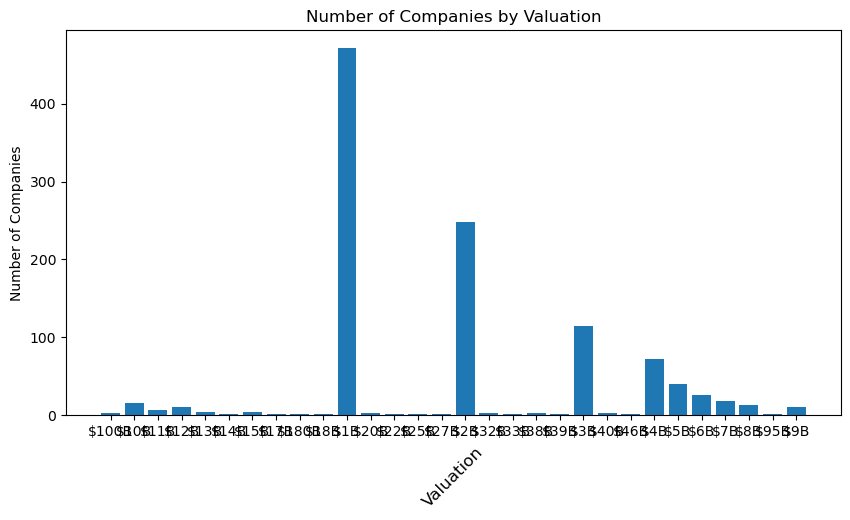

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a Pandas DataFrame
df = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Group the data by valuation and count the number of companies in each valuation group
valuation_counts = df.groupby("Valuation").size()

# Create a bar chart of the valuation counts
plt.figure(figsize=(10, 5))
plt.bar(valuation_counts.index, valuation_counts.values)

# Set the x-axis label to "Valuation"
plt.xlabel("Valuation", rotation=45, fontsize=12)
plt.xticks(fontsize=10)
# Set the y-axis label to "Number of Companies"
plt.ylabel("Number of Companies")

# Set the chart title
plt.title("Number of Companies by Valuation")

# Show the chart
plt.show()


#### THE CHART ABOVE SHOWS THE RELATIONSHIP BETWEEN NUMBER OF COMPANIES BEING OVER 400 AND THEIR  VALUATIONS

In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Extract the company names from the dataset
companies = list(data['Company'])

# Print the list of company names
print(companies)


['Bytedance', 'SpaceX', 'SHEIN', 'Stripe', 'Klarna', 'Canva', 'Checkout.com', 'Instacart', 'JUUL Labs', 'Databricks', 'Revolut', 'Epic Games', 'FTX', 'Fanatics', 'Chime', "BYJU's", 'J&T Express', 'Xiaohongshu', 'Miro', 'Yuanfudao', 'Rapyd', 'Discord', 'Genki Forest', 'goPuff', 'Blockchain.com', 'Plaid', 'Devoted Health', 'OpenSea', 'Grammarly', 'Argo AI', 'Northvolt', 'Faire', 'Airtable', 'Brex', 'Getir', 'Biosplice Therapeutics', 'Bitmain', 'GoodLeap', 'Xingsheng Selected', 'ZongMu Technology', 'Bolt', 'Swiggy', 'Weilong Foods', 'Global Switch', 'Bolt', 'Celonis', 'Zuoyebang', 'Ripple', 'OYO Rooms', 'OutSystems', 'ServiceTitan', 'Alchemy', 'Chehaoduo', 'Digital Currency Group', 'Figma', 'Gusto', 'Lalamove', 'Notion Labs', 'reddit', 'Talkdesk', 'Thrasio', 'Dunamu', 'Yanolja', 'Pony.ai', 'Nuro', 'Snyk', 'Kavak', 'N26', 'Klaviyo', 'Niantic', 'Tanium', 'Dream11', 'DJI Innovations', 'Netskope', 'Razorpay', 'Dapper Labs', 'Lacework', 'Tipalti', 'Hopin', 'Caris Life Sciences', 'Ramp', 'Tempu

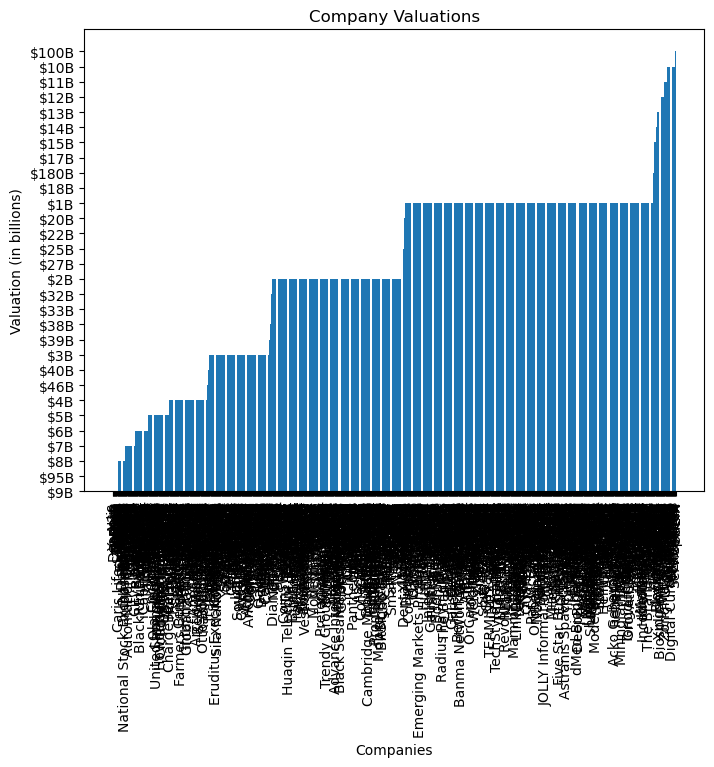

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Sort the data by valuation in descending order
data.sort_values(by='Valuation', ascending=False, inplace=True)

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(data['Company'], data['Valuation'])

# Customize the chart with a title and axis labels
plt.title('Company Valuations')
plt.xlabel('Companies')
plt.ylabel('Valuation (in billions)')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()


#### THE ABOVE CHART  DIGITAL CURRENCY GROUP, HAVE THE  RETURN ON INVESTMENT WITH A VALUE OF 100 BILLION  

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
data =pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")
print(data)

          Company Valuation Date Joined                         Industry  \
0       Bytedance     $180B  07/04/2017          Artificial intelligence   
1          SpaceX     $100B  01/12/2012                            Other   
2           SHEIN     $100B  03/07/2018  E-commerce & direct-to-consumer   
3          Stripe      $95B  23/01/2014                          Fintech   
4          Klarna      $46B  12/12/2011                          Fintech   
...           ...       ...         ...                              ...   
1069     Zhaogang       $1B  29/06/2017  E-commerce & direct-to-consumer   
1070  Zhuan Zhuan       $1B  18/04/2017  E-commerce & direct-to-consumer   
1071     Zihaiguo       $1B  06/05/2021                Consumer & retail   
1072         Zopa       $1B  19/10/2021                          Fintech   
1073        Zwift       $1B  16/09/2020  E-commerce & direct-to-consumer   

               City         Country      Continent  Year Founded Funding  \
0          

In [19]:
# print updated DataFrame
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,07/04/2017,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,01/12/2012,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,03/07/2018,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,23/01/2014,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/2011,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [20]:
# the company with the maximum valuation
# create DataFrame from data
unicorn_companies = pd.DataFrame(data)

# locate row with maximum valuation
max_valuation = unicorn_companies['Valuation'].max()
company_max_valuation = unicorn_companies.loc[unicorn_companies['Valuation'] == max_valuation]
company_max_valuation

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
61,Dunamu,$9B,22/07/2021,Fintech,Seoul,South Korea,Asia,2012,$71M,"Qualcomm Ventures, Woori Investment, Hanwha In..."
62,Yanolja,$9B,10/06/2019,Travel,Seoul,South Korea,Asia,2005,$2B,"SBI Investment Korea, Partners Investment, GIC"
63,Pony.ai,$9B,11/07/2018,Artificial intelligence,Fremont,United States,North America,2016,$1B,"Sequoia Capital China, IDG Capital, DCM Ventures"
64,Nuro,$9B,11/02/2019,Auto & transportation,Mountain View,United States,North America,2016,$2B,"SoftBank Group, Greylock Partners, Gaorong Cap..."
65,Snyk,$9B,21/01/2020,Cybersecurity,Boston,United States,North America,2015,$1B,"BOLDstart Ventures, Google Ventures, Accel"
66,Kavak,$9B,01/10/2020,E-commerce & direct-to-consumer,Lerma de Villada,Mexico,North America,2016,$2B,"DST Global, SoftBank Group, Mountain Nazca"
67,N26,$9B,10/01/2019,Fintech,Berlin,Germany,Europe,2013,$2B,"Redalpine Venture Partners, Earlybird Venture ..."
68,Klaviyo,$9B,17/11/2020,Internet software & services,Boston,United States,North America,2012,$679M,"Summit Partners, Accel, Astral Capital"
69,Niantic,$9B,24/11/2017,Mobile & telecommunications,San Francisco,United States,North America,2015,$770M,"Nintendo, Google, Pokemon Company Internationa..."
70,Tanium,$9B,31/03/2015,Cybersecurity,Kirkland,United States,North America,2007,$775M,"Andreessen Horowitz, Nor-Cal Invest, TPG Growth"


In [21]:
# company names with maximum valuation
company_names = list(company_max_valuation['Company'])
print(company_names)


['Dunamu', 'Yanolja', 'Pony.ai', 'Nuro', 'Snyk', 'Kavak', 'N26', 'Klaviyo', 'Niantic', 'Tanium']


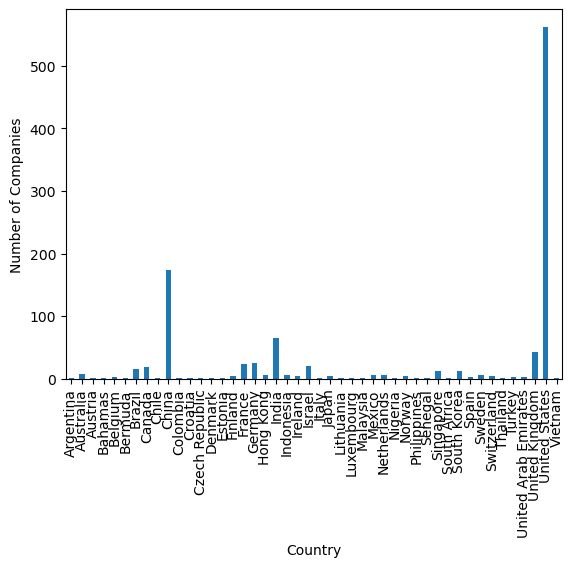

In [22]:
# the relationship between the country and the number of company
import matplotlib.pyplot as plt

# group companies by country and count number of companies in each group
companies_by_country = unicorn_companies.groupby('Country')['Company'].count()

# plot a bar chart of the results
ax = companies_by_country.plot(kind='bar')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Companies')
plt.show()


In [23]:
print(df.columns)

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')


#### THE BAR CHART SHOWS THAT THE UNITED STATES AND CHINA HAVE THE HIGHEST NUMBER OF UNICORN COMPANIES FOLLOWED BY INDIA AND UNITED KINGDOM. 

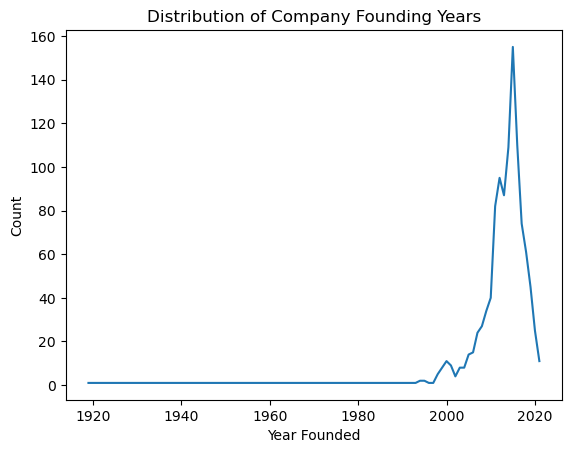

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Count the number of companies founded in each year
founded_counts = data['Year Founded'].value_counts().sort_index()

# Create a line chart of the distribution
founded_counts.plot(kind='line')
plt.title('Distribution of Company Founding Years')
plt.xlabel('Year Founded')
plt.ylabel('Count')
plt.show()








In [25]:
# create DataFrame from data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")
unicorn_companies = pd.DataFrame(data)
# group data by select investor and count number of companies
investor_count = unicorn_companies.groupby('Select Investors')['Company'].count()

# locate investors with maximum number of companies funded
max_count = investor_count.max()
investors_max_count = investor_count.loc[investor_count == max_count]
# print investors with maximum number of companies funded
print("Investors who have funded the most companies:")
print(investors_max_count)



Investors who have funded the most companies:
Select Investors
Sequoia Capital    3
Name: Company, dtype: int64


#### UNIVARIATE ANALYSIS OF THE DATASET

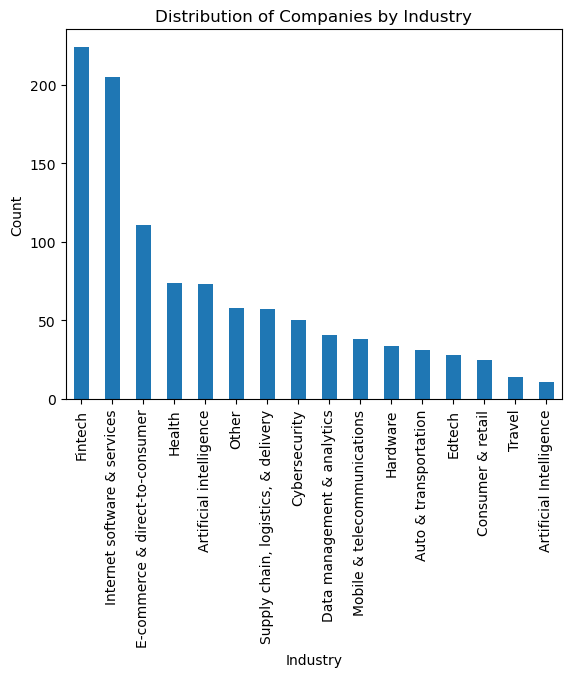

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Count the number of companies in each Industry
category_counts = data["Industry"].value_counts()

# Plot the distribution as a bar chart
category_counts.plot(kind='bar')
plt.title("Distribution of Companies by Industry")
plt.xlabel("Industry")
plt.ylabel('Count')
plt.show()


#### FINTECH AND INTERNET SOFTWARE AND SERVICES HAVE THE HIGHEST NUMBER OF UNICORN COMPANIES  

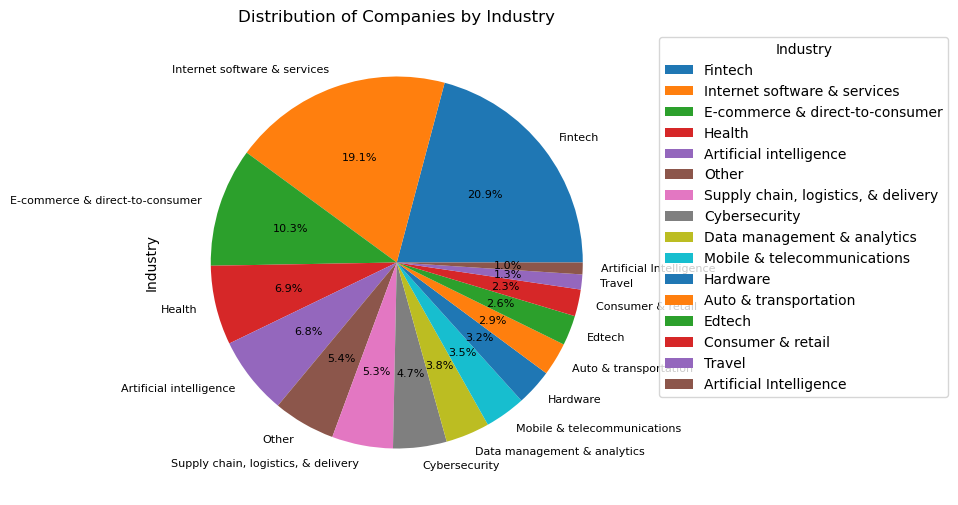

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Count the number of companies in each industry
industry_counts = data['Industry'].value_counts()

# Create a pie chart of the distribution
industry_counts.plot(kind='pie', autopct='%1.1f%%',textprops={'fontsize': 8}, figsize=(6, 8))
plt.title('Distribution of Companies by Industry')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


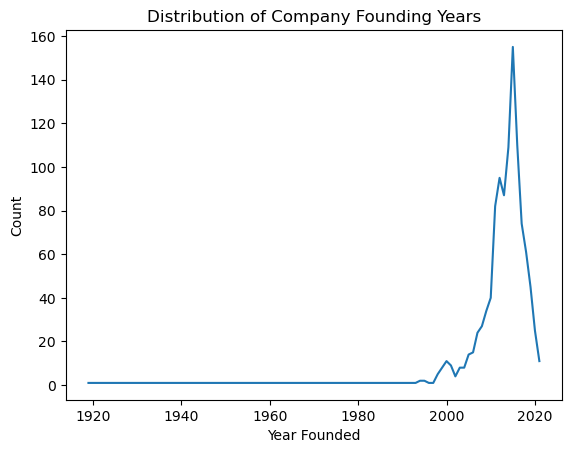

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Count the number of companies founded in each year
founded_counts = data['Year Founded'].value_counts().sort_index()

# Create a line chart of the distribution
founded_counts.plot(kind='line')
plt.title('Distribution of Company Founding Years')
plt.xlabel('Year Founded')
plt.ylabel('Count')
plt.show()


#### THE LINE CHART SHOWS THE NUMBER OF COMPANIES AND THE YEARS THEY WERE FOUNDED .
#### 1920-2000 SHOWED SAME NUMBER OF COMPANIES FOUNDED AND THEN 2000-2020 SAW A HUGE SPIKE IN THE NUMBER OF COMPANIES FOUNDED WITH OVER 150 COMPANIES ESTABLISHED.


#### BIVARIATE ANALYSIS

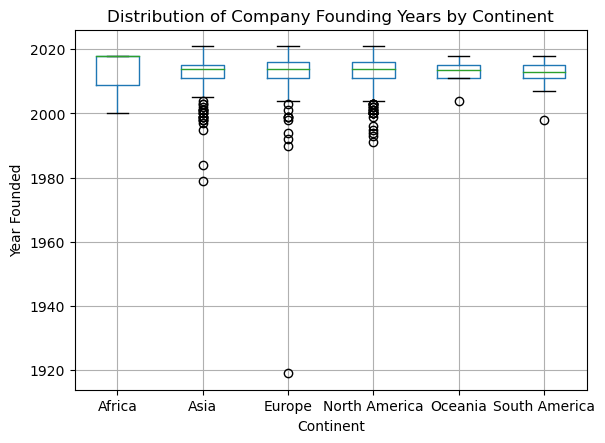

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Create a box plot of founding years by continent
data.boxplot(column='Year Founded', by='Continent')
plt.title('Distribution of Company Founding Years by Continent')
plt.suptitle('')
plt.xlabel('Continent')
plt.ylabel('Year Founded')
plt.show()


#### THE DISTRIBUTION OF COMPANY BASED ON THE CONTINENT AND YEAR THEY WERE FOUNDED SHOWS THAT AFRICA HAD MORE COMPANIES FOUNDED BETWEEN 2000 TO 2020.

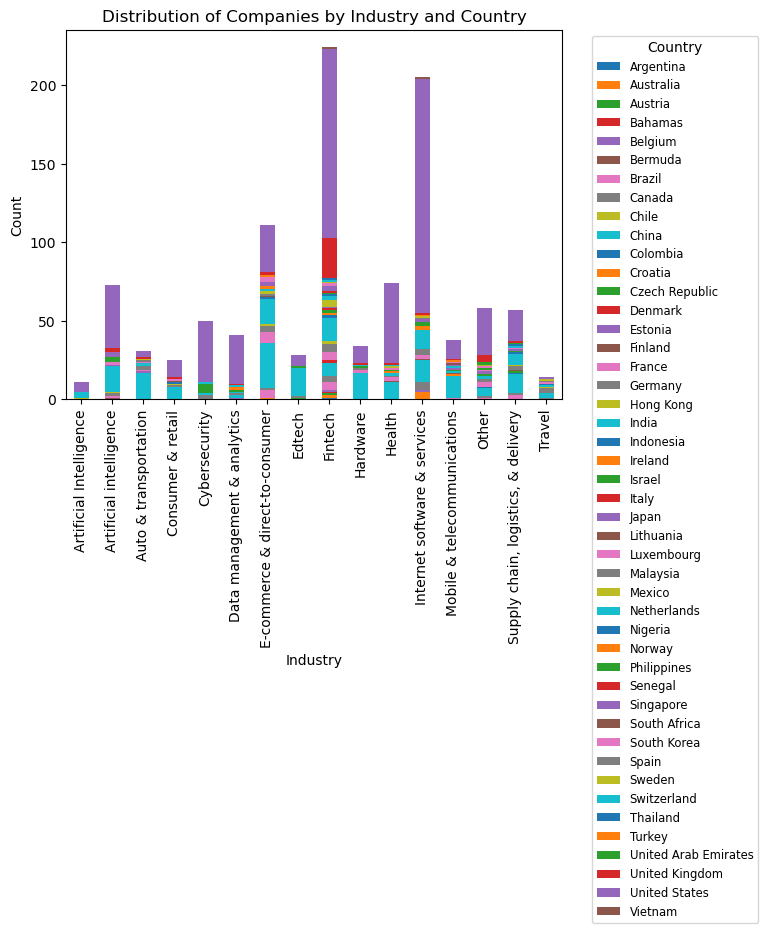

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Group the data by industry and country, and count the number of companies in each group
industry_country_counts = data.groupby(['Industry', 'Country'])['Company'].count().unstack()

# Create a stacked bar chart of the distribution
industry_country_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Companies by Industry and Country')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()



#### CREATE A MULTIVARIATE ANALYSIS

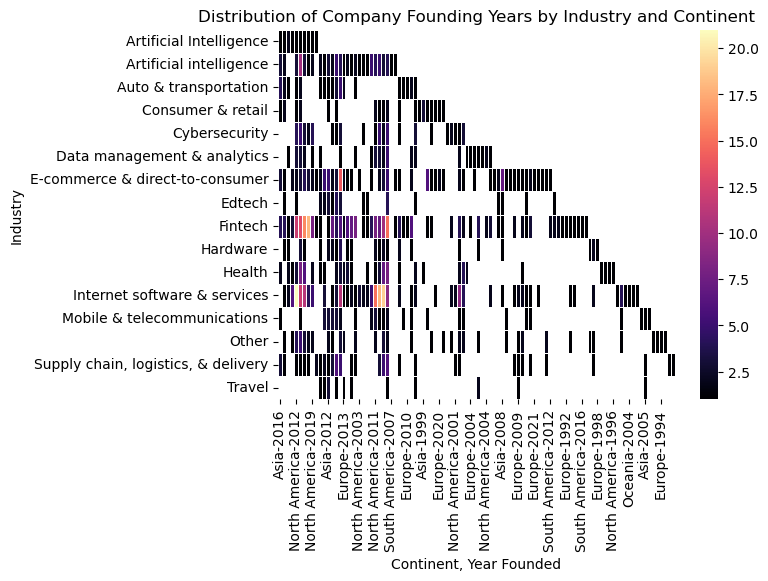

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")

# Group the data by industry, continent, and founding year, and count the number of companies in each group
industry_continent_year_counts = data.groupby(['Industry', 'Continent', 'Year Founded'])['Company'].count().reset_index()

# Create a heat map of the distribution
sns.heatmap(industry_continent_year_counts.pivot(index='Industry', columns=['Continent', 'Year Founded'], values='Company'), cmap="magma", linewidths=0.5)
plt.title('Distribution of Company Founding Years by Industry and Continent')
plt.xlabel('Continent, Year Founded')
plt.ylabel('Industry')
plt.show()


#### THE CHART SHOWS THAT FINTECH INDUSTRY IS MORE POSITIVELY COORELATED COMPARED TO THE OTHER INDUSTRY.

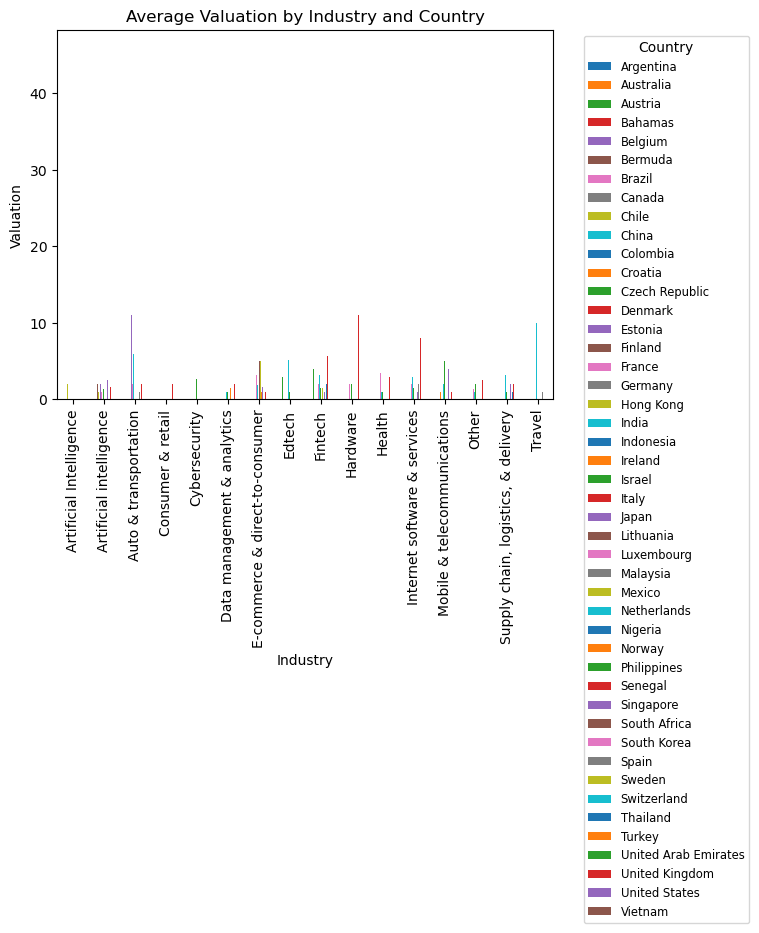

In [32]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
data = pd.read_csv(r"C:\Users\joyom\OneDrive\Unicorn_Companies.csv")
# Clean the Valuation column
data['Valuation'] = data['Valuation'].str.replace('[^\d.]', '', regex=True)
data['Valuation'] = pd.to_numeric(data['Valuation'], errors='coerce')

# Remove rows with missing values in the Valuation column
data = data.dropna(subset=['Valuation'])

# Calculate the average valuation of companies in each industry and country
industry_country_means = data.groupby(['Industry', 'Country'])['Valuation'].mean().unstack()

# Create a grouped bar chart of the average valuations
industry_country_means.plot(kind='bar')
plt.title('Average Valuation by Industry and Country')
plt.xlabel('Industry')
plt.ylabel('Valuation')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()




#### THE CHART SHOWS THAT AUTO & TRANSPORTATION, HARDWARE INDUSTRIES HAVE HIGHER VALUATION THAN THE OTHER INDUSTRIES.
